In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Medical Test Result Analysis for Disease Risk

In [3]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [5]:
df = pd.read_csv('insurance.csv')

In [6]:
# 2. Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [7]:
# 3. Show summary statistics
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [8]:
# 4. Check for missing values
print(df.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [9]:
# 5. Encode categorical variables
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [10]:
# 6. Check correlation with charges
print(df.corr()['charges'].sort_values(ascending=False))

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64


In [11]:
# 7. Prepare features and target
X = df.drop('charges', axis=1)
y = df['charges']

In [12]:
# 8. Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 9. Scale numerical features
scaler = StandardScaler()
num_cols = ['age', 'bmi', 'children']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Load the dataset
df = pd.read_csv('insurance.csv')

# 2. Display basic info
print(df.info())

# 3. Show summary statistics
print(df.describe())

# 4. Check for missing values
print(df.isnull().sum())

# 5. Encode categorical variables
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

# 6. Check correlation with charges
print(df.corr()['charges'].sort_values(ascending=False))

# 7. Prepare features and target
X = df.drop('charges', axis=1)
y = df['charges']

# 8. Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Scale numerical features
scaler = StandardScaler()
num_cols = ['age', 'bmi', 'children']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 10. Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Linear Regression R2:", r2_score(y_test, lr_pred))

# 11. Train Decision Tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree R2:", r2_score(y_test, dt_pred))

# 12. Train Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, rf_pred))

# 13. Feature importance from Random Forest
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_imp)

# 14. Calculate RMSE for models
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, dt_pred)))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))

# 15. Create predictions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

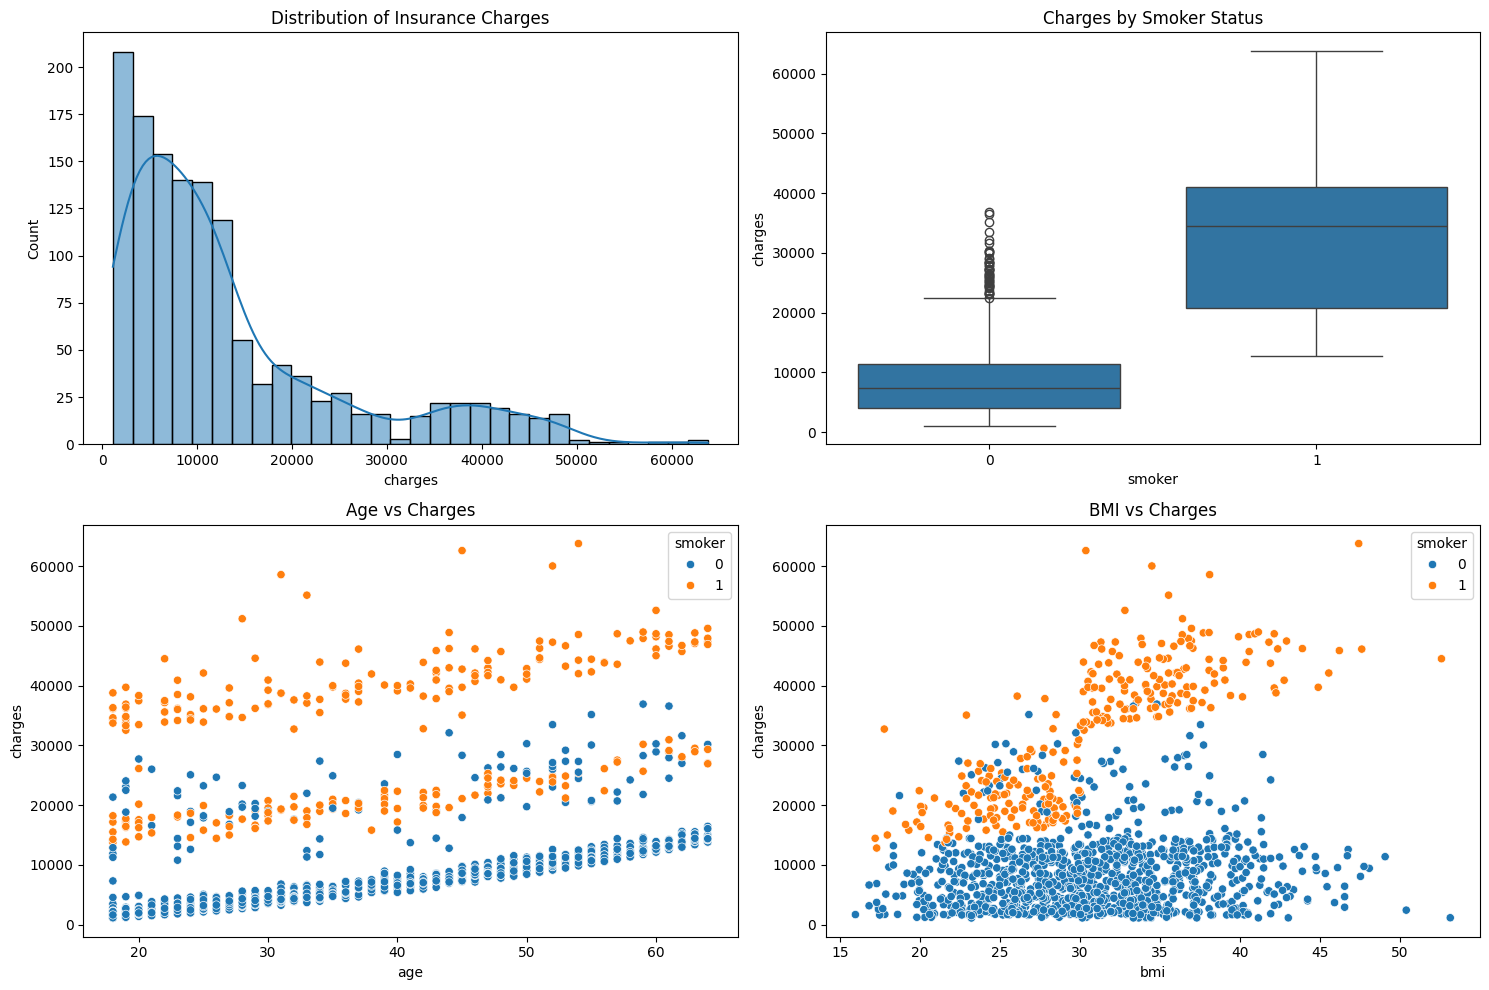

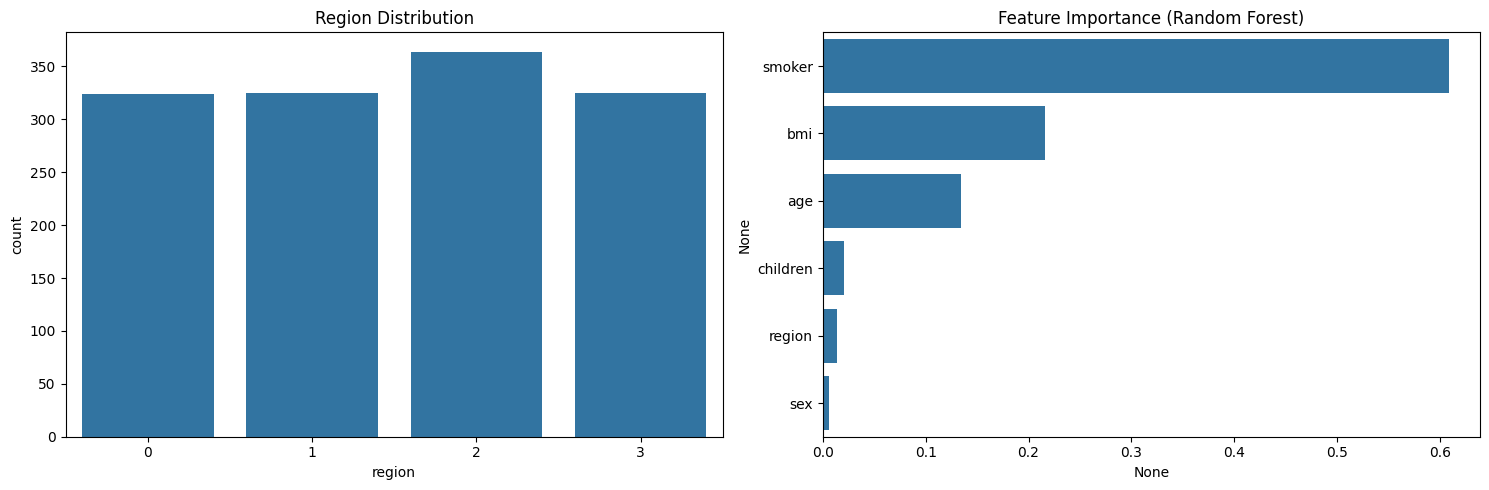

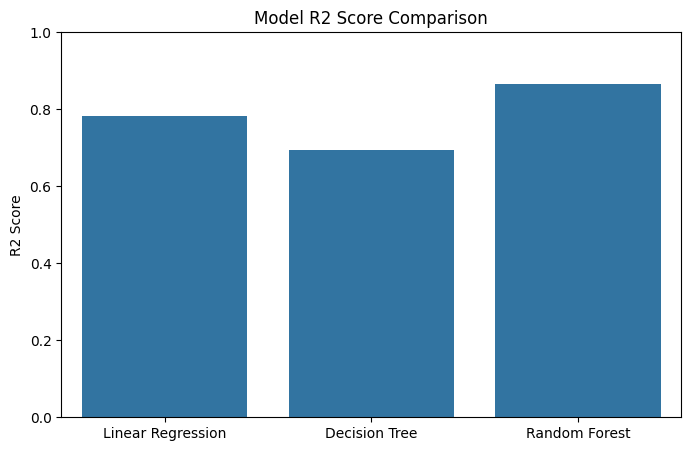

In [16]:
# Visualization Section
plt.figure(figsize=(15, 10))

# 1. Distribution of charges
plt.subplot(2, 2, 1)
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Insurance Charges')

# 2. Charges by smoker status
plt.subplot(2, 2, 2)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')

# 3. Age vs Charges
plt.subplot(2, 2, 3)
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Age vs Charges')

# 4. BMI vs Charges
plt.subplot(2, 2, 4)
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('BMI vs Charges')

plt.tight_layout()
plt.show()

# Additional visualizations
plt.figure(figsize=(15, 5))

# 5. Region distribution
plt.subplot(1, 2, 1)
sns.countplot(x='region', data=df)
plt.title('Region Distribution')

# 6. Feature importance
plt.subplot(1, 2, 2)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance (Random Forest)')

plt.tight_layout()
plt.show()

# Model performance comparison
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [r2_score(y_test, lr_pred), r2_score(y_test, dt_pred), r2_score(y_test, rf_pred)]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=r2_scores)
plt.title('Model R2 Score Comparison')
plt.ylabel('R2 Score')
plt.ylim(0, 1)
plt.show()

